### HEART DISEASE PREDICTION PROJECT 
Predicting the likelihood that the patient will have the Heart Disease

### Project Overview
Heart disease also known as Cardiovascular disease encompasses a wide range of conditions affecting the heart and blood vessels. The primary objective of this project is to identify a patient at risk aiming for early detection, improved patient outcomes and reduce the severity of heart disease and allocate resources effectively focusing on high risk patients. The capstone project will use supervised machine learning techniniques to classify patients as having or not having the heart disease. The model will leverage data from the "heart_disease.csv" dataset, which includes demographic information, clinical measurements, and historical health data.

### Business Understanding/Problem statement
Heart disease is a leading cause of death globally and early detection and intervention are essential for reducing mortality rates. Prediction of heart disease is a critical challenge in the area of clinical data analysis. Despite growing awareness, early detection and risk assessment remain challenging due to limited local research and data-driven insights. This study aims to analyze key health indicators. By identifying major risk factors and trends, this research seeks to support healthcare professionals, policymakers, and researchers in developing targeted interventions, improving early diagnosis, and enhancing public health strategies to combat heart disease in Kenya.

### Objectives
1. To develop a predictive model by creating machine learning model capable of accurately predicting the likelihood of heart diseas
2. Identify idividuals at high risk of developing the heart disease
3. To reduce the number of heart disease related deaths
4.  To contribute to Public Health efforts by identifying high risk populations and informing policy decisions


### Data understanding
Dataset: The project utilizes grom Kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease) with 10,000 rows    and 21 Columns






In [12]:
# Importing relevant libraries
import pandas as pd

In [13]:
# Load the dataset
data = pd.read_csv(r"C:\Users\abn\OneDrive\Desktop\Phase 5 project\Group-10-Heart-disease-project\Data\heart_disease.csv")

In [14]:
# Check the first few rows of the dataset
data.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

#### Data structure

In [15]:
# Get the basic info about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [16]:
# Check for any missing values
data.isnull().sum()


Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

#### Column Description
1. Gender: The individual's gender (Male or Female).
2. Blood Pressure: The individual's blood pressure (systolic).
3. Cholesterol Level: The individual's total cholesterol level.
4. Exercise Habits: The individual's exercise habits (Low, Medium, High).
5. Smoking: Whether the individual smokes or not (Yes or No).
6. Family Heart Disease: Whether there is a family history of heart disease (Yes or No).
7. Diabetes: Whether the individual has diabetes (Yes or No).
8. BMI: The individual's body mass index.High Blood Pressure: Whether the individual has high blood pressure (Yes or No).
9. Low HDL Cholesterol: Whether the individual has low HDL cholesterol (Yes or No).
10. High LDL Cholesterol: Whether the individual has high LDL cholesterol (Yes or No).
11. Alcohol Consumption: The individual's alcohol consumption level (None, Low, Medium, High).
12. Stress Level: The individual's stress level (Low, Medium, High).
13. Sleep Hours: The number of hours the individual sleeps.
14. Sugar Consumption: The individual's sugar consumption level (Low, Medium, High).
15. TriglyAge: The individual's age.
16. ceride Level: The individual's triglyceride level.
17. Fasting Blood Sugar: The individual's fasting blood sugar level.
18. CRP Level: The C-reactive protein level (a marker of inflammation).
19. Homocysteine Level: The individual's homocysteine level (an amino acid that affects blood vessel health).
20. Heart Disease Status: The individual's heart disease status (Yes or No).

In [17]:
# Get summary statistics
data.describe()

Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037

#### Data cleaning

In [18]:
# Drop rows with missing values 
data = data.dropna() 
data 

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
5     25.0    Male           152.0              257.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
5                      No       No  28.144681                  No  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
5                      No                 Low       Medium    5.504876   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                None         High    8.247784   
9997                  Yes                None          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
5                   Low              126.0                 91.0   4.297575   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
5              10.815983                    No  
...                  ... 

In [20]:
# Remove duplicates
data = data.drop_duplicates()
data

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
5     25.0    Male           152.0              257.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
5                      No       No  28.144681                  No  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
5                      No                 Low       Medium    5.504876   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                None         High    8.247784   
9997                  Yes                None          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
5                   Low              126.0                 91.0   4.297575   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
5              10.815983                    No  
...                  ... 

<AxesSubplot:>

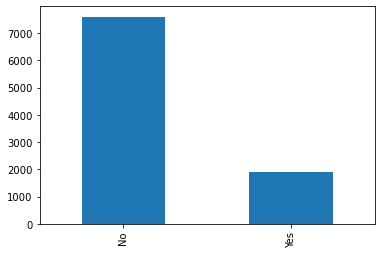

In [21]:
# The target variable indicates whether or not a patient has heart disease. 
# Check the distribution of the target variable
data['Heart Disease Status'].value_counts().plot(kind='bar')


In [23]:
# Convert categorical features into numerical features

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0       0           146.0              286.0            High      No   
2     46.0       1           126.0              216.0             Low      No   
3     32.0       0           122.0              293.0            High     Yes   
4     60.0       1           166.0              242.0             Low     Yes   
5     25.0       1           152.0              257.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0       0           136.0              243.0          Medium     Yes   
9996  38.0       1           172.0              154.0          Medium      No   
9997  73.0       1           152.0              201.0            High     Yes   
9998  23.0       1           142.0              299.0             Low     Yes   
9999  38.0       0           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
5                      No       No  28.144681                  No  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
5                      No                 Low       Medium    5.504876   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                None         High    8.247784   
9997                  Yes                None          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
5                   Low              126.0                 91.0   4.297575   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
5              10.815983                    No  
...                  ... 

#### Visualization

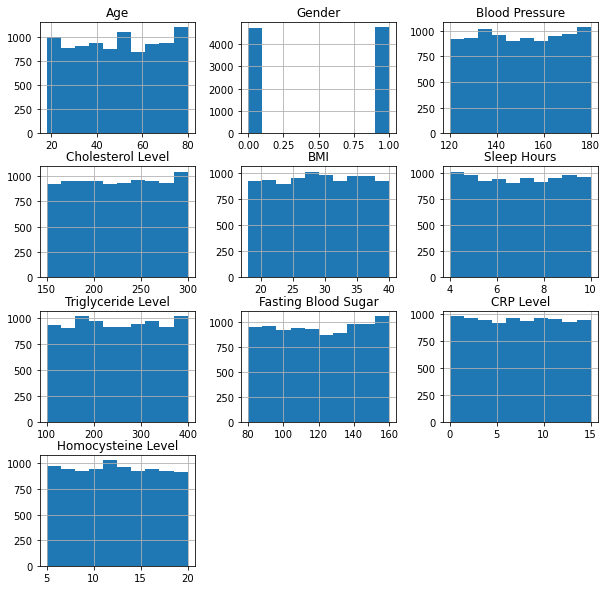

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
data.hist(figsize=(10, 10))
plt.show()

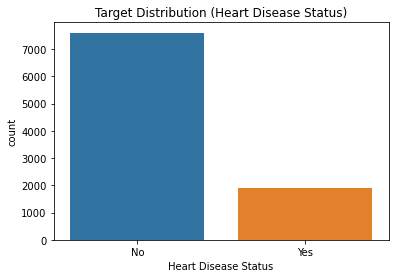

In [27]:
# Count plot for categorical features
sns.countplot(x='Heart Disease Status', data=data)
plt.title("Target Distribution (Heart Disease Status)")
plt.show()

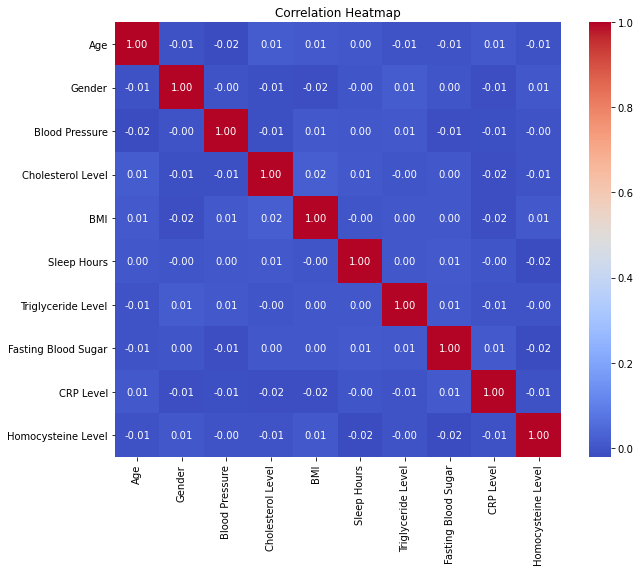

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

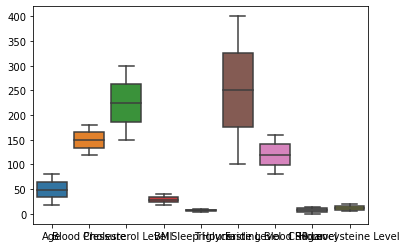

In [ ]:
# Boxplot for numerical features to check for outliers
sns.boxplot(data=data)
plt.show()

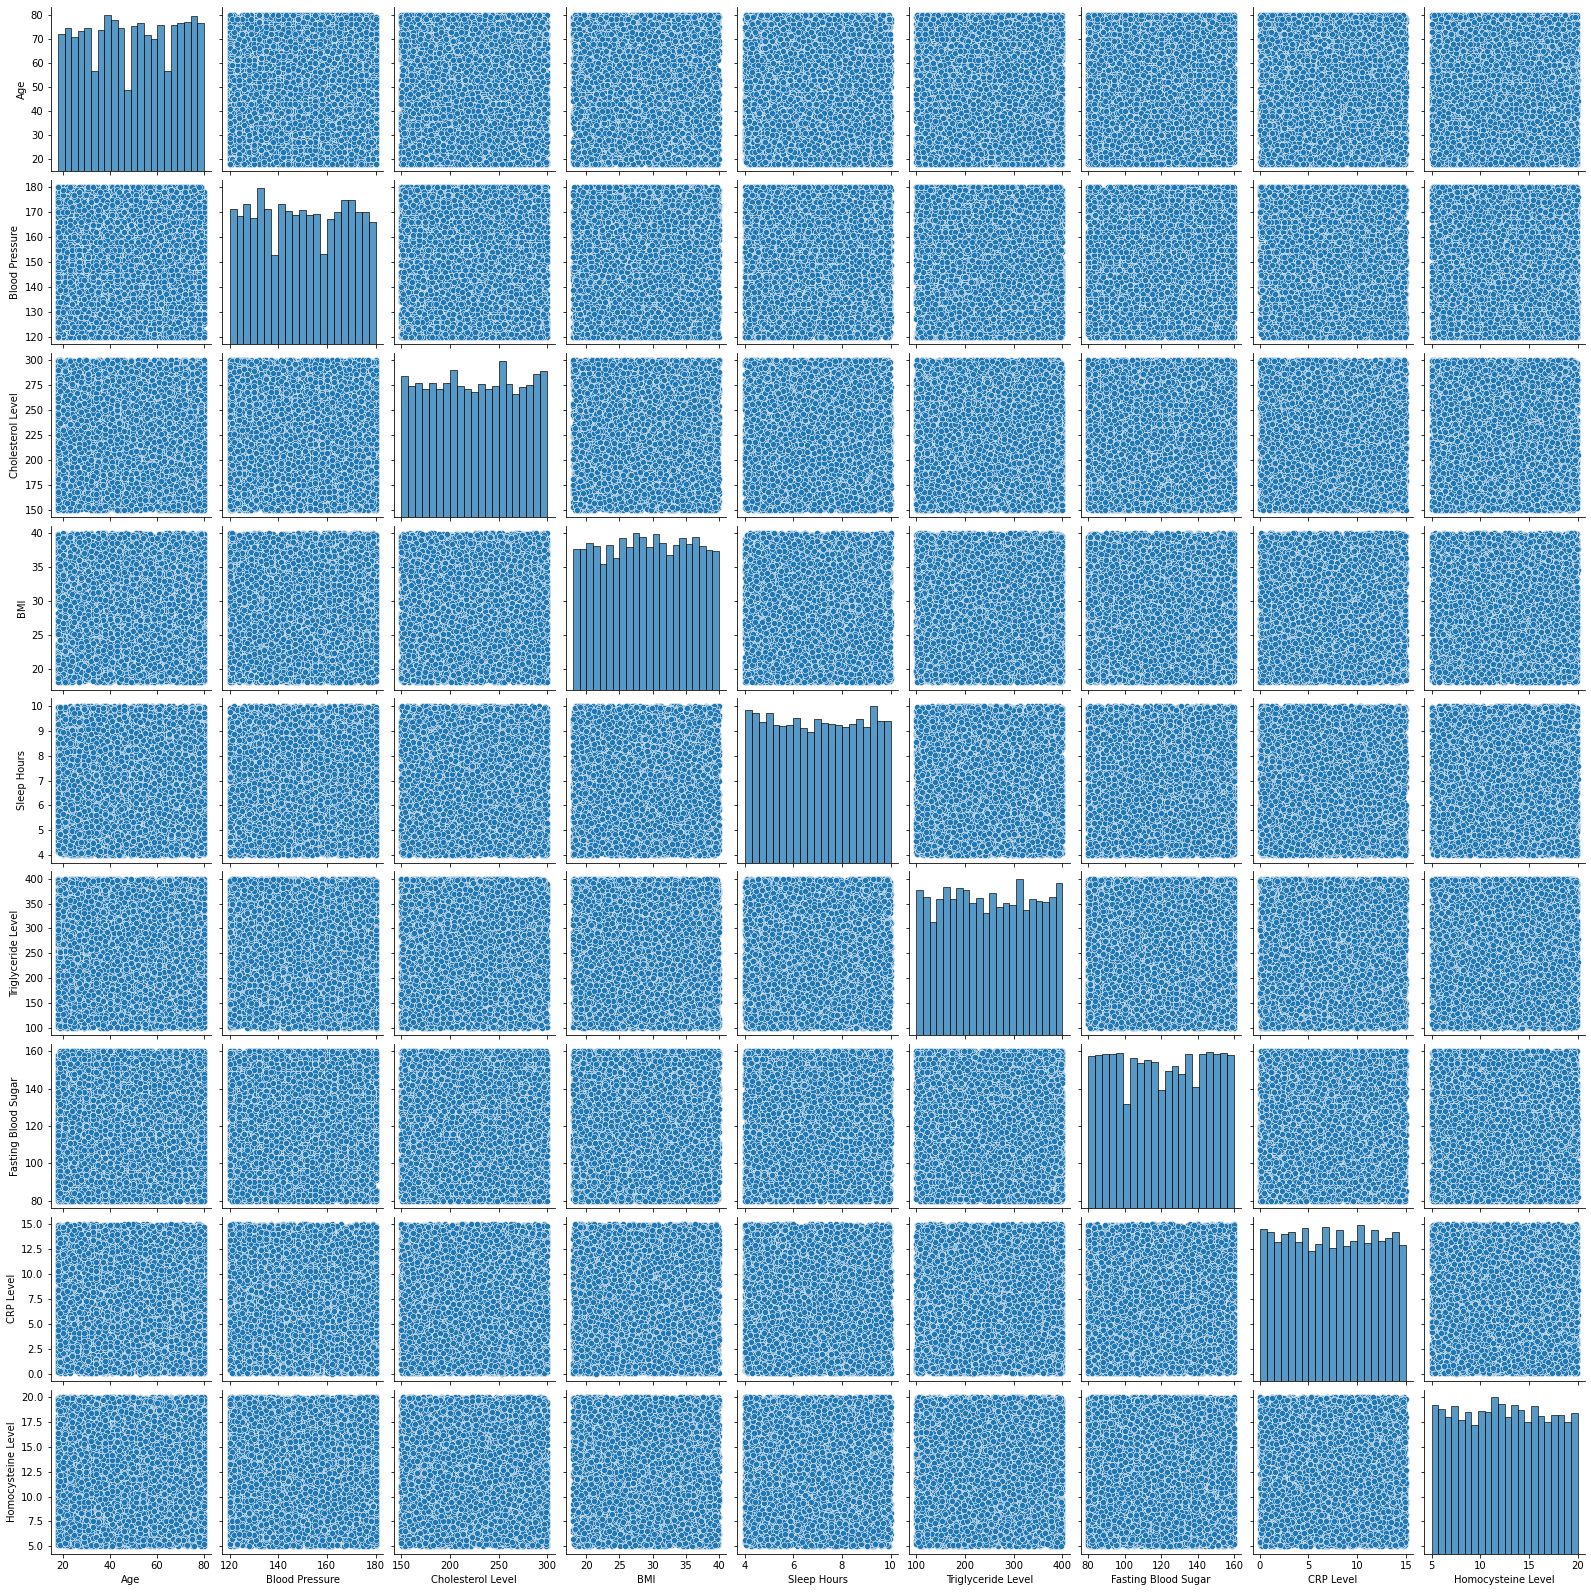

In [ ]:
# Pairplot (for smaller datasets with few numerical features):
sns.pairplot(data)
plt.show()

In [ ]:
#  correlation matrix
corr = data.corr()
corr


Age  Blood Pressure  Cholesterol Level       BMI  \
Age                  1.000000       -0.019232           0.014005  0.013485   
Blood Pressure      -0.019232        1.000000          -0.011642  0.008053   
Cholesterol Level    0.014005       -0.011642           1.000000  0.021694   
BMI                  0.013485        0.008053           0.021694  1.000000   
Sleep Hours          0.003867        0.003244           0.008189 -0.001902   
Triglyceride Level  -0.005650        0.007345          -0.000501  0.003180   
Fasting Blood Sugar -0.005398       -0.014297           0.002146  0.004913   
CRP Level            0.005901       -0.010653          -0.017254 -0.016437   
Homocysteine Level  -0.008067       -0.002304          -0.005401  0.007756   

                     Sleep Hours  Triglyceride Level  Fasting Blood Sugar  \
Age                     0.003867           -0.005650            -0.005398   
Blood Pressure          0.003244            0.007345            -0.014297   
Cholesterol Level       0.008189           -0.000501             0.002146   
BMI                    -0.001902            0.003180             0.004913   
Sleep Hours             1.000000            0.004095             0.011910   
Triglyceride Level      0.004095            1.000000             0.008447   
Fasting Blood Sugar     0.011910            0.008447             1.000000   
CRP Level              -0.001473           -0.005950             0.013487   
Homocysteine Level     -0.022194           -0.003987            -0.019272   

                     CRP Level  Homocysteine Level  
Age                   0.005901           -0.008067  
Blood Pressure       -0.010653           -0.002304  
Cholesterol Level    -0.017254           -0.005401  
BMI                  -0.016437            0.007756  
Sleep Hours          -0.001473           -0.022194  
Triglyceride Level   -0.005950           -0.003987  
Fasting Blood Sugar   0.013487           -0.019272  
CRP Level             1.000000           -0.008084  
Homocysteine Level   -0.008084            1.000000

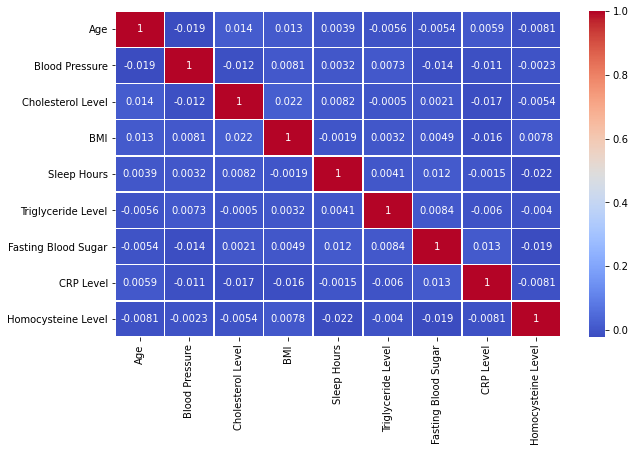

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

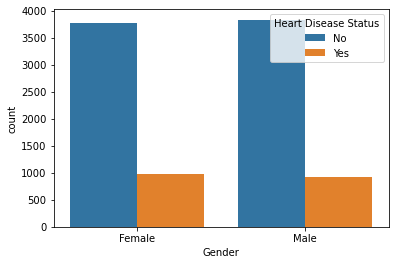

In [ ]:

# Count plot for categorical features against the target
sns.countplot(x='Gender', hue='Heart Disease Status', data=data)
plt.show()


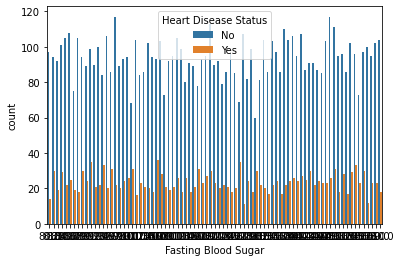

In [ ]:
# For Fasting Blood Sugar type
sns.countplot(x='Fasting Blood Sugar', hue='Heart Disease Status', data=data)
plt.show()

#### Feature Engineering

In [ ]:
# binning continuous variables or converting categorical variables into numeric ones if required.
data['age_group'] = pd.cut(data['Age'], bins=[29, 39, 49, 59, 69, 80], labels=['30-39', '40-49', '50-59', '60-69', '70+'])
data

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
5     25.0    Male           152.0              257.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
5                      No       No  28.144681                  No  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     Alcohol Consumption Stress Level Sleep Hours Sugar Consumption  \
1                 Medium         High    8.744034            Medium   
2                    Low          Low    4.440440               Low   
3                    Low         High    5.249405              High   
4                    Low         High    7.030971              High   
5                    Low       Medium    5.504876               Low   
...                  ...          ...         ...               ...   
9995              Medium         High    6.834954            Medium   
9996                None         High    8.247784               Low   
9997                None          Low    4.436762               Low   
9998              Medium         High    8.526329            Medium   
9999                High       Medium    5.659394              High   

      Triglyceride Level Fasting Blood Sugar  CRP Level  Homocysteine Level  \
1                  133.0               157.0   9.355389           19.298875   
2                  393.0                92.0  12.709873           11.230926   
3                  293.0                94.0  12.509046            5.961958   
4                  263.0               154.0  10.381259            8.153887   
5                  126.0                91.0   4.297575           10.815983   
...                  ...                 ...        ...                 ...   
9995               343.0               133.0   3.588814           19.132004   
9996               377.0                83.0   2.658267            9.715709   
9997               248.0                88.0   4.408867            9.492429   
9998               113.0               153.0   7.215634           11.873486   
9999               121.0               149.0  14.387810            6.208531   

      Heart Disease Status  age_group  
1                       No      60-69  
2                       No      40-49  
3                       No      30-39  
4                       No      60-69  
5                       No        NaN  
...                    ...        ...  
9995                   Yes        NaN  
9996                   

#### Data Modelling

In [ ]:
# split your data into training and testing sets, and normalize or standardize features if necessary.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target
X = data.drop('Heart Disease Status', axis=1)
y = data['Heart Disease Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
data


Age  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0           146.0              286.0            High      No   
2     46.0           126.0              216.0             Low      No   
3     32.0           122.0              293.0            High     Yes   
4     60.0           166.0              242.0             Low     Yes   
5     25.0           152.0              257.0             Low     Yes   
...    ...             ...                ...             ...     ...   
9995  25.0           136.0              243.0          Medium     Yes   
9996  38.0           172.0              154.0          Medium      No   
9997  73.0           152.0              201.0            High     Yes   
9998  23.0           142.0              299.0             Low     Yes   
9999  38.0           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  \
1                     Yes      Yes  25.221799                  No   
2                      No       No  29.855447                  No   
3                     Yes       No  24.130477                 Yes   
4                     Yes      Yes  20.486289                 Yes   
5                      No       No  28.144681                  No   
...                   ...      ...        ...                 ...   
9995                   No       No  18.788791                 Yes   
9996                   No       No  31.856801                 Yes   
9997                   No      Yes  26.899911                  No   
9998                   No      Yes  34.964026                 Yes   
9999                  Yes      Yes  25.111295                  No   

     Low HDL Cholesterol  ... Fasting Blood Sugar_151.0  \
1                    Yes  ...                         0   
2                    Yes  ...                         0   
3                     No  ...                         0   
4                     No  ...                         0   
5                     No  ...                         0   
...                  ...  ...                       ...   
9995                  No  ...                         0   
9996                  No  ...                         0   
9997                 Yes  ...                         0   
9998                  No  ...                         0   
9999                 Yes  ...                         0   

     Fasting Blood Sugar_152.0 Fasting Blood Sugar_153.0  \
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
5                            0                         0   
...                        ...                       ...   
9995                         0                         0   
9996                         0                         0   
9997                         0                         0   
9998                         0                         1   
9999                         0                         0   

      Fasting Blood Sugar_154.0 Fasting Blood Sugar_155.0  \
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             1                         0   
5                             0                         0   
...                         ...                       ...   
9995                          0                         0   
9996                          0                         0   
9997                          0                         0   
9998                          0                         0   
9999                          0                         0   

      Fasting Blood Sugar_156.0  Fasting Blood Sugar_157.0  \
1                             0                          1   
2             